In [ ]:
#import all libraries needed
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import GlorotUniform

import numpy as np



# Multiclass Image Classification

The images are broken down into 4 classes with the directory structure 

imagenett_4class/[test|train|validation]/[church|garbage_truck|gas_pump|parachute]/ILSRVC2012_val_000XXXXX.jpg

The images are all 426x320x3 (RGB), broken down into:

* training images [1200]
* validation images [100]
* test images [50]


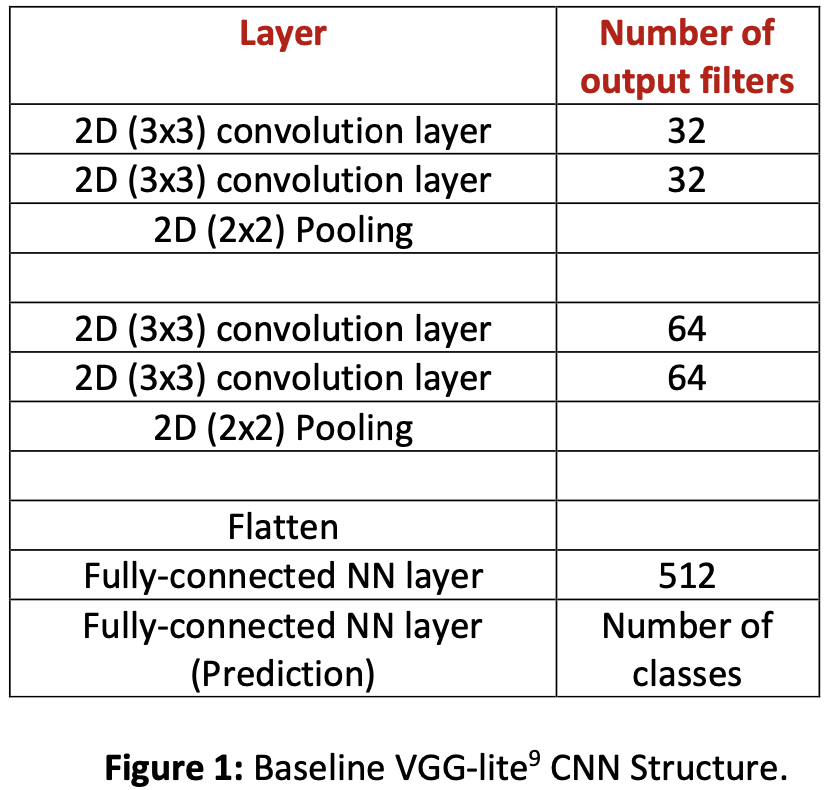

# Data Inputation

identify the train:test:validation datasets based on the sample data. Use the keras ImageDataGenerator to pull in the data from the directories and use the directory name as the classifier. Fortunately, this is how the input dataset is used

In [ ]:
# Switch to Image Data Source Location (or gDrive)

trainDataImages = ImageDataGenerator()
testDataImages = ImageDataGenerator()
validDataImages = ImageDataGenerator()

# Load Train/Validation/Test input files from directory structure with classifications
# Image size if 426x320, or resize to this if not correct size
traindata = trainDataImages.flow_from_directory(directory="train",target_size=(426,320), class_mode="categorical")
validdata = ValidDataImages.flow_from_directory(directory="validation", target_size=(426,320),class_mode="categorical")
testdata = testDataImages.flow_from_directory(directory="test", target_size=(426,320), class_mode="categorical")


FileNotFoundError: ignored

In [ ]:
# Generate a sequential model, based on the VGG-16 Lite variant for the assignment

#Setup the Xavier Initialiser - this is the default, but well include as explicit
initializer = GlorotUniform()

model = Sequential()
model.add(Conv2D(input_shape=(426,320,3),filters=32,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer=initializer))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=initializer))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer=initializer))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu",kernel_initializer=initializer))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=512,activation="relu",kernel_initializer=initializer))
model.add(Dense(units=4, activation="softmax",kernel_initializer=initializer))



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 426, 320, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 426, 320, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 213, 160, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 213, 160, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 213, 160, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 106, 80, 64)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 542720)           

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy','loss'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 426, 320, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 426, 320, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 213, 160, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 213, 160, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 213, 160, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 106, 80, 64)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 542720)           

Evaluation Metrics

* Required Diagrams: Illustrate you answer with appropriate training and validation accuracy and loss diagrams.
* Required Metrics: Final validation accuracy and loss, final test accuracy and loss, confusion matrix and the networks computational cost.
* Required Models: All models developed should be saved in Hierarchical Data Format (HDF5) (.h5) format.


Include in the metrics:
* validation accuracy and loss
* test accuracy and loss
* confusion matrix
* network computational cost


In [ ]:
# During training, we want to introduce a checkpoint callback (which we also use for Practicum research!)

from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

# Use the fit generator to take the input from the above image data generators for classification
# Check Steps per epoch to 
hist = model.fit_generator(steps_per_epoch=1200,generator=traindata, validation_data= validdata, validation_steps=12,epochs=5,callbacks=[checkpoint,early])